22ug1-0392 - K G V T Gamage

Lab 08

In [ ]:
#Step 1: Load Dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


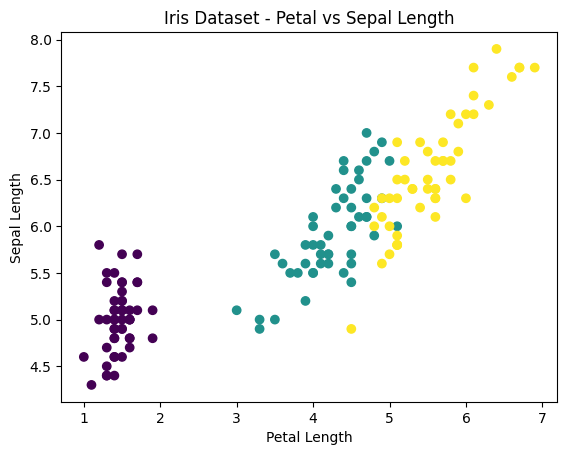

In [ ]:
# Step 2: Visualize the Data
import matplotlib.pyplot as plt
plt.scatter(X[:, 2], X[:, 0], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.title("Iris Dataset - Petal vs Sepal Length")
plt.show()

In [ ]:
#Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

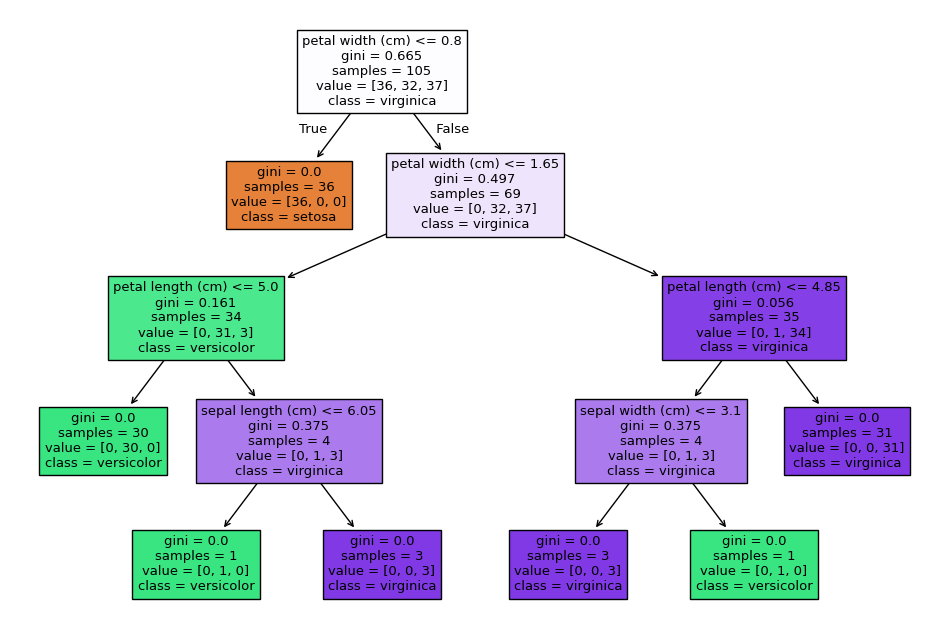

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(classifier, filled=True,
feature_names=iris.feature_names,
class_names=iris.target_names)
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
print("Predictions:", y_pred)
print("Actual:", y_test)

Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.9555555555555556
Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X_train, y_train)
# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy.fit(X_train, y_train)
# Accuracy Comparison
acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))
acc_entropy = accuracy_score(y_test, clf_entropy.predict(X_test))
print("Accuracy with Gini:", acc_gini)
print("Accuracy with Entropy:", acc_entropy)

Accuracy with Gini: 0.9555555555555556
Accuracy with Entropy: 0.9555555555555556


* Breast Cancer Wisconsin Diagnostic Dataset*

---



In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Update the path to your file in Drive
df = pd.read_csv('/content/drive/MyDrive/Sem 7/ML/data.csv')
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Encode target: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("Features:\n", X.head())
print("\nTarget:\n", y.head())

Features:
          id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33      

In [6]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
#Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
#Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Accuracy: 0.9298245614035088

Confusion Matrix:
 [[67  4]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        71
   Malignant       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



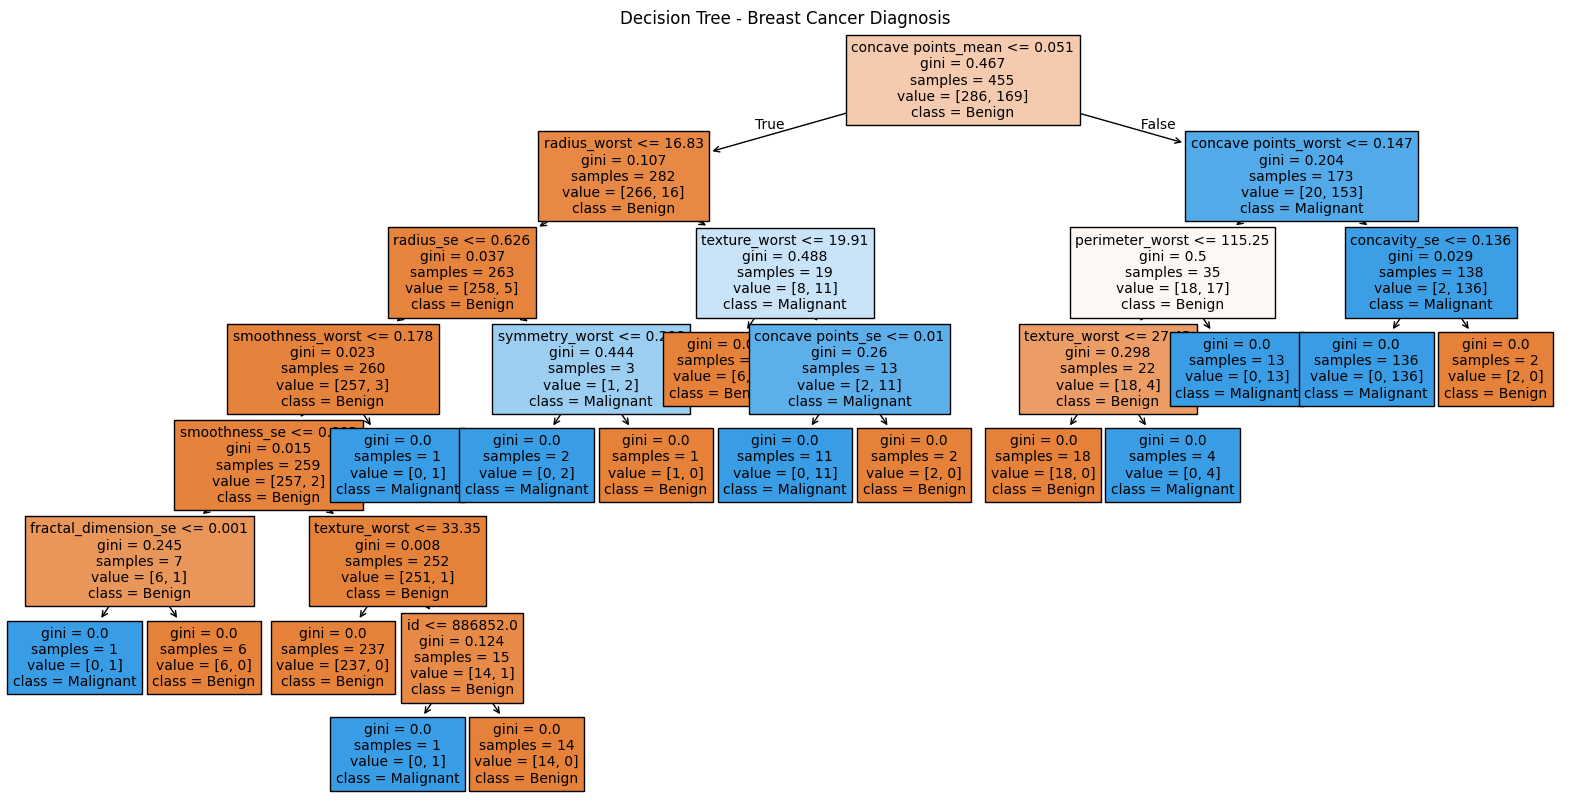

In [9]:
#Visualize the Decision Tree`
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               filled=True,
               feature_names=X.columns,
               class_names=["Benign", "Malignant"],
               fontsize=10)
plt.title("Decision Tree - Breast Cancer Diagnosis")
plt.show()


In [10]:
#Try Gini vs Entropy and Adjusting max_dept
# Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))

# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
acc_entropy = accuracy_score(y_test, clf_entropy.predict(X_test))

print("Accuracy (Gini):", acc_gini)
print("Accuracy (Entropy):", acc_entropy)


Accuracy (Gini): 0.9298245614035088
Accuracy (Entropy): 0.9473684210526315


In [11]:
#Try different max_depth
for depth in range(1, 11):
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_depth.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf_depth.predict(X_test))
    print(f"Accuracy with max_depth={depth}: {acc:.4f}")


Accuracy with max_depth=1: 0.8947
Accuracy with max_depth=2: 0.9298
Accuracy with max_depth=3: 0.9386
Accuracy with max_depth=4: 0.9386
Accuracy with max_depth=5: 0.9298
Accuracy with max_depth=6: 0.9386
Accuracy with max_depth=7: 0.9298
Accuracy with max_depth=8: 0.9298
Accuracy with max_depth=9: 0.9298
Accuracy with max_depth=10: 0.9298
